## Setup
- 1. Create a new repository: public, Add a README file, Add .gitgnore: python
- 2. Open in github desktop, choose clone. File should cloned in my data. 
- 3. Tap Pipenv shell in terminal 
- 4. Push to github: pipfile init 
- 5. In terminal: pipenv install numpy pandas seaborn matplotlib 
- 6. In terminal: pipenv install ipykernel 
- 7. Under Pipfile, it shows the packages and their versions that installed. 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Intro till Pandas
- Series object
- DataFrame object

In [8]:
import pandas as pd

data = dict(AI = 25, NET = 30, APP = 27, Java = 23)
#data  #{'AI': 25, 'NET': 30, 'APP': 27, 'Java': 23}
series = pd.Series(data=data)
series

AI      25
NET     30
APP     27
Java    23
dtype: int64

In [9]:
data2 = dict(AI = "25", NET = 30, APP = 27, Java = 23)
series2 = pd.Series(data=data2)
series2

AI      25
NET     30
APP     27
Java    23
dtype: object

In [14]:
# extracting values
print(f"series[0]: {series[0]}")
print(f"series[-1]: {series[-1]}")

# extracting keys
print(f"series.keys: {series.keys()}")
print(f"series.keys[-2]: {series.keys()[-2]}")

series[0]: 25
series[-1]: 23
series.keys: Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys[-2]: APP


## DataFrame

In [17]:
pf = pd.DataFrame(series)
#print(pf)
pf

,0
AI,25
NET,30
APP,27
Java,23


In [19]:
pf = pd.DataFrame(series, columns=("Number students",))  #"," is compulsory
#print(pf)
pf

,Number students
AI,25
NET,30
APP,27
Java,23


In [24]:
languages = pd.Series(dict(AI="Python", NET ="C#", APP="Kotlin", Java="JAVA"))
df = pd.DataFrame({"Students":series, "Language":languages})
df

,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [25]:
df.index # komma åt index

Index(['AI', 'NET', 'APP', 'Java'], dtype='object')

## Data selection

In [30]:
df.Students   # gets a Series with attribute-approach, risk finns if the key is sum

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [32]:
df["Students"]  # gets a Series with dictionary-keys approach (__getitem__())

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [36]:
# multiple columns
df[["Language", "Students"]]

,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [54]:
# wants to get all rows > 24 students
print(df["Students"] > 24)  # __gt__()
# this is operation (operate overloading), faster than looping  

# masking
large_groups = df[df["Students"]>24]  # picked out all rows that are True. evaluating the bool series.
large_groups

AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool


,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


In [45]:
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


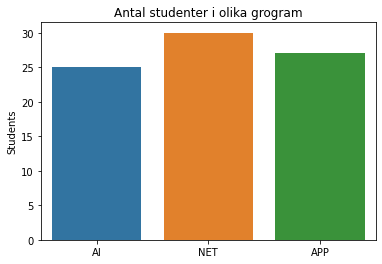

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=large_groups, x=large_groups.index, y="Students")
plt.title("Antal studenter i olika grogram"); #Utan ";", ska printa Text(0.5, 1.0, 'Antal studenter i olika grogram')
#sns set tile can aslo be used instead of matplotlib

In [59]:
# Read Excel

calories = pd.read_excel("../Data/calories.xlsx")
calories

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
